#### Following files are going to be used in the creation of this model:
- **stage_2_train_images_jpeg_512_only_1.rar** - rar-file contains images, resized to dimensions-512x512, belonging to class-1
- **stage_2_train_images_jpeg_512.zip** - - zip-file contains all images (both classes), resized to dimensions-512x512
- **labels_new** - Labels data is in the same format as the original one but the values have been modified corresponding to images with dimensions, 512x512


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting all Images belonging to class-1
# uncomment if not so
!pip install unrar
!unrar x '/content/drive/My Drive/pneumonia_detection/stage_2_train_images_jpeg_512_only_1.rar' -d /content

Streaming output truncated to the last 5000 lines.
Extracting  /content/stage_2_train_images_jpeg_512_only_1/3251dea8-4f74-4f4b-8f56-167b0213414b.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/3258ba2b-f4fe-45f2-ac47-5d6d1fa5819c.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/32652bc7-21e2-4aa4-ae0c-461950e4c131.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/32659f33-5e60-4db1-9696-657e54b769c8.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/32721abb-10c7-4797-88c6-bf47d32e95e6.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/327573f4-41c7-471b-b613-50dbb86a02da.jpeg      16%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/3275fe4e-18e7-4fe2-94f9-aa0d725232aa.jpeg      17%  OK 
Extracting  /content/stage_2_train_images_jpeg_512_only_1/32764f2f-ea89-4d7c-aa7d-e70366

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The MaskRCNN library that we will be using requires specific versions of some packages
# Installing packages
!pip install tensorflow-gpu==1.15.3
!pip install Keras==2.2.4
!pip install pydicom
!pip install wget

     |████████████████████████████████| 411.0MB 41kB/s 
     |████████████████████████████████| 3.8MB 47.0MB/s 
     |████████████████████████████████| 512kB 39.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=85d150dacfd407367e71708fa008fd9815b5710a877b307e8da28413df885f97
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing i

In [ ]:
!ls

drive  sample_data  stage_2_train_images_jpeg_512_only_1


In [ ]:
cd /content/drive/My Drive/pneumonia_detection

/content/drive/My Drive/pneumonia_detection


In [ ]:
# Clonning MaskRCNN library from github
import os
if 'Mask_RCNN' not in os.listdir():
  !git clone https://github.com/matterport/Mask_RCNN.git  

In [ ]:
!ls

id_to_intId  Mask_RCNN		  rsna-pneumonia-detection-challenge
labels_new   mask_rcnn_coco.h5	  saved
logs	     nb.ipynb		  stage_2_train_images_jpeg_512_only_1
logs2	     pneumonia.ipynb	  stage_2_train_images_jpeg_512_only_1.rar
logs_old     pneumonia_old.ipynb  stage_2_train_images_jpeg_512.zip


In [ ]:
cd Mask_RCNN

/content/drive/My Drive/pneumonia_detection/Mask_RCNN


In [ ]:
# installing MaskRCNN API
!python setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/__init__.py to __init_

In [ ]:
# importing packages
import numpy as np
import os
import pandas as pd
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2 as cv
import pydicom as dicom

from mrcnn.visualize import display_instances
from mrcnn.utils import Dataset
from mrcnn.utils import extract_bboxes
from mrcnn.utils import compute_ap
from mrcnn.config import Config 
from mrcnn.model import MaskRCNN 
from mrcnn.model import mold_image 
from mrcnn.model import load_image_gt
from mrcnn.visualize import display_instances

Using TensorFlow backend.


In [ ]:
cd ..

/content/drive/My Drive/pneumonia_detection


In [ ]:
# path of data folder
data_path = Path('rsna-pneumonia-detection-challenge')

### Labels data

In [ ]:
!ls

id_to_intId  Mask_RCNN		  rsna-pneumonia-detection-challenge
labels_new   mask_rcnn_coco.h5	  saved
logs	     nb.ipynb		  stage_2_train_images_jpeg_512_only_1
logs2	     pneumonia.ipynb	  stage_2_train_images_jpeg_512_only_1.rar
logs_old     pneumonia_old.ipynb  stage_2_train_images_jpeg_512.zip


In [ ]:
filename = 'labels_new'
if filename not in os.listdir():
  print(f'{filename} not found in {Path.cwd()}')
else:
  import pickle
  with open(filename, 'rb') as infile:
    labels_new = pickle.load(infile)

In [ ]:
labels_new.shape

(30227, 6)

In [ ]:
labels_new.head(5)

patientId    x    y  width height Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  NaN  NaN    NaN    NaN      0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  NaN  NaN    NaN    NaN      0
2  00322d4d-1c29-4943-afc9-b6754be640eb  NaN  NaN    NaN    NaN      0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  NaN  NaN    NaN    NaN      0
4  00436515-870c-4b36-a041-de91049b9ab4  132   76  106.5  189.5      1

#### id_to_intId: dict, mapping of each patient's id to a unique integer id¶

In [ ]:
# generating an integer id for each patient, saving it so as to use same mapping in the future
if 'id_to_intId' not in os.listdir():
  id_to_intId = {id: i for i, id in enumerate(labels_new['patientId'].unique())}
  filename = 'id_to_intId'
  with open(filename, 'wb') as outfile:
    pickle.dump(id_to_intId, outfile)
else:
  filename = 'id_to_intId'
  with open(filename, 'rb') as infile:
    id_to_intId = pickle.load(infile)

In [ ]:
# definning image dimensions
IMAGE_WIDTH, IMAGE_HEIGHT = 512, 512

##### Note: Train and test data only contains images from class 1 as this is the approach that we are going to employ for the prediction of boundung-box coordinates.
##### Later when performing final evaluation, we will append class-0 images as well in the original proportion

In [ ]:
# class for preparation and loading of train and test data
class PneumoniaDataset(Dataset):
    def load_dataset(self, dataset_dir, train_size=0.8, for_train=True):
        # define one class
        self.add_class('dataset', 1, 'pneumonia')
        # define data location (jpeg)

        # class-1 images
        images_path1 = Path('/content/stage_2_train_images_jpeg_512_only_1')
        images = np.asarray(os.listdir(str(images_path1)))
        n_images = len(images)
        
        # spliting data into train and test
        if for_train:
            train_filter = np.remainder(np.arange(n_images), int(train_size*10)) != 0
            images = images[train_filter]
        elif not for_train:
            test_filter = np.remainder(np.arange(n_images), int(train_size*10)) == 0
            images = images[test_filter]

        # extract bounding-box-position
        for image_name in images:
            id = image_name.split('.')[0]
            label = labels_new[labels_new['patientId'] == id].iloc[:, 1:]
            bboxes = []
            for _, bbox in label.iterrows():
                bboxes.append(bbox)
            image_id = id_to_intId[id]
            
            image_path = images_path1 / image_name
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=image_path, bboxes=bboxes)

        
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # get box-position
        bboxes = info['bboxes']
        # create one array for all masks, each on a different channel
        masks = np.zeros([IMAGE_HEIGHT, IMAGE_WIDTH, len(bboxes)], dtype='uint8')
        # create masks
        class_ids = []
        for i, bbox in enumerate(bboxes): 
            if  bbox['Target'] == 0:
                class_ids.append(self.class_names.index('pneumonia'))
                break
            # float to int
            bbox = bbox.astype(int)
            row_s, row_e = bbox['x'], bbox['x'] + bbox['width']
            col_s, col_e = bbox['y'], bbox['y'] + bbox['height']
            masks[col_s: col_e, row_s:row_e, i] = 1
            class_ids.append(self.class_names.index('pneumonia'))
        return (masks, np.asarray(class_ids, dtype='int32'))
    
    
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
# train set
train_set = PneumoniaDataset()
train_set.load_dataset(data_path, train_size=0.8, for_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test set
test_set = PneumoniaDataset()
test_set.load_dataset(data_path, train_size=0.8, for_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 5260
Test: 752


If you encounter the below error, re-run the cell until no error - 
#### OSError: [Errno 5] Input/output error: 'rsna-pneumonia-detection-challenge/stage_2_train_images'

### Training dataset

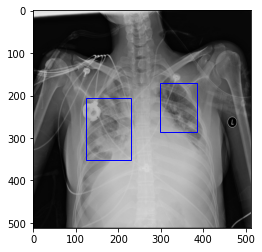

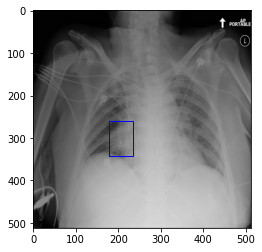

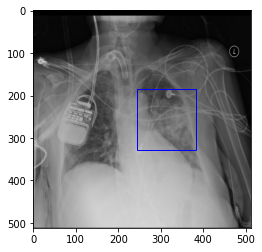

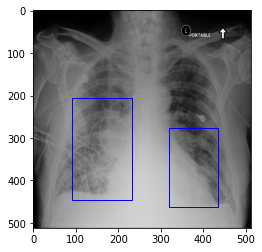

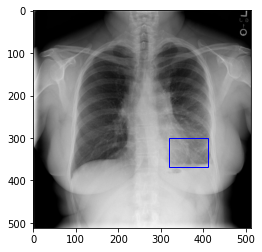

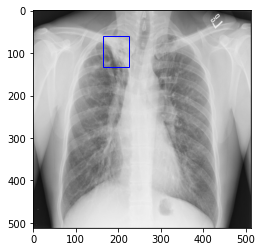

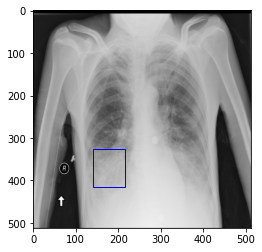

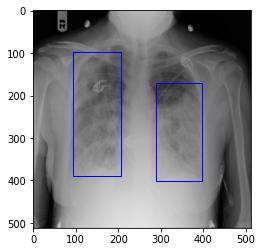

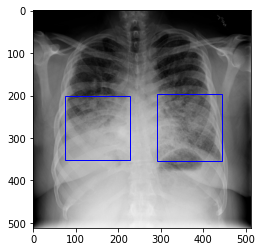

In [ ]:
# plot first few images
for i in range(9):
    # define subplot
    fig, ax = plt.subplots(1)
#     plt.figure(figsize=(12, 12))
#     plt.subplot(330 + 1 + i)
    # plot raw pixel data
    image = train_set.load_image(i)
#     plt.imshow(image)
    # plot all masks
    mask, _ = train_set.load_mask(i)
    bboxes = extract_bboxes(mask)
    for bbox in bboxes:
        if np.sum(bbox) == 0:
            break
        y, x, y_, x_ = bbox 
        h, w = y_ - y, x_ - x
        patch = Rectangle((x, y), w, h, color='blue', fill=False)
        ax.add_patch(patch)
    ax.imshow(image)

# show the figure
plt.show()

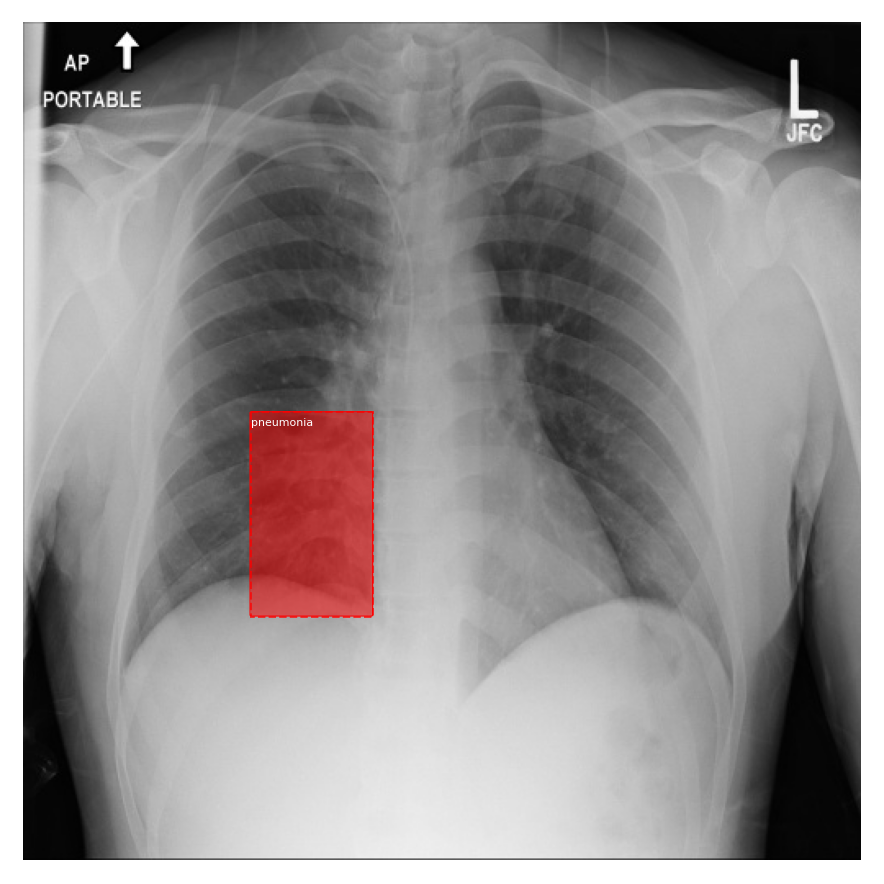

In [ ]:
image_id = 42
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

### Trainning approach
There are several ways to train MaskRCNN - 
- One is to train only the 'head' layers, which is whats called Tranfer Learning wherein we start with pre-trained weights and train only top layers (higer-level). We tried that and found that `loss` would start converging without learning enough, this is perhaps because the pre-trained model is trained on real-life, data-to-day object's images which are vastly different from the images we have here which are X-ray images.

- We can also include more layers to train.
- However, since these images belongs to a vastly different category, we decided to not to use pre-pretrained model and train all the layers.

##### Below is the whole trainning process

#### We require to create a model-configuration file, which defines various parameters and settings like, Learning-rate, epoch-size, etc.

#### calculating mean-value of images which is one of the model's configuration

In [ ]:
# means = np.empty(shape=len(train_set.image_ids), dtype='uint8')
# for i, image_id in enumerate(train_set.image_ids):
#   # load the image
#   image = train_set.load_image(image_id)
#   mean = image.mean()
#   means[i] = mean

# MEAN = means.mean()
# print(MEAN)

#### mean-value turns out to be 124.57

In [ ]:
# define a configuration of the model
class PneumoniaConfig(Config):
    # Give the configuration a recognizable name
    NAME = 'pneumonia_cfg'
    # Number of class (background + pneumonia)
    NUM_CLASSES = 1 + 1        

    # Adjust based on your GPU memory and image sizes. Use the highest
    # number that your GPU can handle for best performance.
    IMAGES_PER_GPU = 8

    # Number of training steps per epochs
    STEPS_PER_EPOCH = 1000 // IMAGES_PER_GPU

    # Number of validation steps to run at the end of every training epoch.
    # A bigger number improves accuracy of validation stats, but slows
    # down the training.
    VALIDATION_STEPS = 80 // IMAGES_PER_GPU

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)

    # Image mean (RGB)
    MEAN_PIXEL = np.array([124.57, 124.57, 124.57])  

    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    IMAGE_CHANNEL_COUNT = 3


    BACKBONE = 'resnet50'

    TRAIN_ROIS_PER_IMAGE = 128

    MAX_GT_INSTANCES = 50
    
    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.8

    DETECTION_NMS_THRESHOLD = 0.01

    LEARNING_RATE = 0.001

    # Loss weights for more precise optimization.
    # Can be used for R-CNN training setup.
    # setting 'mrcnn_mask_loss' to 0 as this is irrelevant to our task
    LOSS_WEIGHTS = {
        "rpn_class_loss": 1.,
        "rpn_bbox_loss": 1.,
        "mrcnn_class_loss": 1.,
        "mrcnn_bbox_loss": 1.,
        "mrcnn_mask_loss": 0.
    }
    

# prepare config
config = PneumoniaConfig()

#### Confiuration: 
- `IMAGES_PER_GPU` should be as high as possible. We had access to atmost 12 GB of GPU RAM which allowed us to set it to atmost 8.
- The role of Backbone is to extract features which coukd then furher be passed to CNN-layers. Two options are available here: 'resnet50' and 'resnet101', the latter one being a relatively deep network. We set `BACKBONE` to 'resnet50' to reuce memory load and for faster trainning.
- `DETECTION_NMS_THRESHOLD`:It may so happen that the model predicts overlapping bounding-boxes, rendering some predictions to be useless. This is exactly what we noticed in some initial results. We changed it's value from 0.3 (default) to 0.01 after epoch-80.
- `TRAIN_ROIS_PER_IMAGE` - We set it to 128. It may be lowered down to increase trainning speed with the expense of performance.
- `LEARNING_RATE`- It had been set to 0.001 throughout the trainning as there had been no plateauing of loss. It might need to be lowered down if trained further.
- Images have been rescaled to 512x512 dimensions to increase trainning speed

In [ ]:
# Directory to save logs and trained model
if 'logs' not in os.listdir():
  os.mkdir('logs')
MODEL_DIR = str(Path.cwd() / 'logs')

In [ ]:
# define the model
model = MaskRCNN(mode='training', config=config, model_dir=MODEL_DIR)

In [ ]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Load saved model
model_path = '/content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_0260.h5'
model.load_weights(model_path, by_name=True)

Re-starting from epoch 260


### Training

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=20, layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=40, layers='all')


Starting at epoch 20. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=60, layers='all')


Starting at epoch 40. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=80, layers='all')


Starting at epoch 60. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=100, layers='all')


Starting at epoch 80. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=120, layers='all')


Starting at epoch 100. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

Starting from epoch 116

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=130, layers='all')


Starting at epoch 116. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=150, layers='all')


Starting at epoch 130. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=180, layers='all')


Starting at epoch 180. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=200, layers='all')


Starting at epoch 180. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

Epoch 182/200
125/125 [==============================] - 242s 2s/step - loss: 0.5688 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1754 - mrcnn_class_loss: 0.0752 - mrcnn_bbox_loss: 0.3132 - mrcnn_mask_loss: 0.0000e+00 - val_loss: 0.7648 - val_rpn_class_loss: 0.0076 - val_rpn_bbox_loss: 0.3591 - val_mrcnn_class_loss: 0.0803 - val_mrcnn_bbox_loss: 0.3178 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 183/200
125/125 [==============================] - 242s 2s/step - loss: 0.5496 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1620 - mrcnn_class_loss: 0.0792 - mrcnn_bbox_loss: 0.3035 - mrcnn_mask_loss: 0.0000e+00 - val_loss: 0.7752 - val_rpn_class_loss: 0.0061 - val_rpn_bbox_loss: 0.3208 - val_mrcnn_class_loss: 0.0942 - val_mrcnn_bbox_loss: 0.3541 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 184/200
125/125 [==============================] - 242s 2s/step - loss: 0.5798 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.1756 - mrcnn_class_loss: 0.0853 - mrcnn_bbox_loss: 0.3131 - mrcnn_mask_loss: 0.0000e+00 - val_l

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=220, layers='all')


Starting at epoch 200. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=240, layers='all')


Starting at epoch 220. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=260, layers='all')


Starting at epoch 240. LR=0.001

Checkpoint Path: /content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3

## Inference

Plot graphs

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir {'logs'}

#### Since the model was trained only on class 1 i.e. infected patients and the original data comprise of both class 1 and class 0 (not-infected). Let us now append class 0 to both train_set and test_set maintaining the proportion of classes which in this case is 0.8 for trainset and 0.2 for test_set

##### extracting images class-1 and class-0 to colab's disk

In [ ]:
# Extracting all Images, both classes
# uncomment if not so
!unzip '/content/drive/My Drive/pneumonia_detection/stage_2_train_images_jpeg_512.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/stage_2_train_images_jpeg_512/83208148-1cad-4186-a6c9-97cd0901722a.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/c5bf2e86-f262-4010-8321-466dac552baa.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/7184cc40-a58a-40df-9aa7-39d610190410.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/44334be1-1a2c-4ef3-b1f1-d262ed5f68dc.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/23e9b940-daea-4092-a2c5-6c92bb615e25.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/c5a27c73-aef3-407e-9724-333e97a583c9.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/e6e39bc5-31f7-4315-a9f0-18a86d339c5f.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/f655a822-225d-4fe0-a69f-0886f91c5f2b.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/7cec580b-d147-4f31-8e2b-41ffe8c940c7.jpeg  
  inflating: /content/stage_2_train_images_jpeg_512/c2bf72e6-cedf-423b-9a25-f60e60f67

In [ ]:
# Directory to save logs and trained model
if 'logs' not in os.listdir():
  os.mkdir('logs')
MODEL_DIR = str(Path.cwd() / 'logs')

In [ ]:
class PneumoniaDataset(Dataset):
    def load_dataset(self, dataset_dir, train_size=0.8, for_train=True):
        # define one class
        self.add_class('dataset', 1, 'pneumonia')
        # define data location (jpeg)

        # class-1 images
        images_path1 = Path('/content/stage_2_train_images_jpeg_512_only_1')
        images = np.asarray(os.listdir(str(images_path1)))
        n_images = len(images)
        
        # spliting data into train and test
        if for_train:
            train_filter = np.remainder(np.arange(n_images), int(train_size*10)) != 0
            images = images[train_filter]
        elif not for_train:
            test_filter = np.remainder(np.arange(n_images), int(train_size*10)) == 0
            images = images[test_filter]

        # extract bounding-box-position
        for image_name in images:
            id = image_name.split('.')[0]
            label = labels_new[labels_new['patientId'] == id].iloc[:, 1:]
            bboxes = []
            for _, bbox in label.iterrows():
                bboxes.append(bbox)
            image_id = id_to_intId[id]
            
            image_path = images_path1 / image_name
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=image_path, bboxes=bboxes)

        # class-0 images
        images_path = Path('/content/stage_2_train_images_jpeg_512')
        images = np.asarray(os.listdir(str(images_path)))
        n_images = len(images)
        
        # spliting data into train and test
        if for_train:
            train_filter = np.remainder(np.arange(n_images), int(train_size*10)) != 0
            images = images[train_filter]
        elif not for_train:
            test_filter = np.remainder(np.arange(n_images), int(train_size*10)) == 0
            images = images[test_filter]

        # extract bounding-box-position
        for image_name in images:
            id = image_name.split('.')[0]
            label = labels_new[labels_new['patientId'] == id].iloc[:, 1:]
            bboxes = []
            for _, bbox in label.iterrows():
                bboxes.append(bbox)
            if len(bboxes) == 0:
              continue
            image_id = id_to_intId[id]
            
            image_path = images_path / image_name
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=image_path, bboxes=bboxes)
                  
        
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # get box-position
        bboxes = info['bboxes']
        # create one array for all masks, each on a different channel
        masks = np.zeros([IMAGE_HEIGHT, IMAGE_WIDTH, len(bboxes)], dtype='uint8')
        # create masks
        class_ids = []
        for i, bbox in enumerate(bboxes): 
            if  bbox['Target'] == 0:
                class_ids.append(self.class_names.index('pneumonia'))
                break
            # float to int
            bbox = bbox.astype(int)
            row_s, row_e = bbox['x'], bbox['x'] + bbox['width']
            col_s, col_e = bbox['y'], bbox['y'] + bbox['height']
            masks[col_s: col_e, row_s:row_e, i] = 1
            class_ids.append(self.class_names.index('pneumonia'))
        return (masks, np.asarray(class_ids, dtype='int32'))
    
    
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
train_set = PneumoniaDataset()
train_set.load_dataset(data_path, train_size=0.8, for_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test set
test_set = PneumoniaDataset()
test_set.load_dataset(data_path, train_size=0.8, for_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 28608
Test: 4088


In [ ]:
# define the prediction configuration
class InferenceConfig(Config):
	# define the name of the configuration
	NAME = "pneumoniua_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1

	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	
	# Length of square anchor side in pixels
	RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)

	# Image mean (RGB)
	MEAN_PIXEL = np.array([124.57, 124.57, 124.57])  

	IMAGE_RESIZE_MODE = 'square'
	IMAGE_MIN_DIM = 512
	IMAGE_MAX_DIM = 512

	BACKBONE = 'resnet50'

	TRAIN_ROIS_PER_IMAGE = 128

	# Minimum probability value to accept a detected instance
	# ROIs below this threshold are skipped
	DETECTION_MIN_CONFIDENCE = 0.8

	DETECTION_NMS_THRESHOLD = 0.01

	MAX_GT_INSTANCES = 50

In [ ]:
# create config
cfg = InferenceConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=cfg)

In [ ]:
# Load saved model
model_path = '/content/drive/My Drive/pneumonia_detection/logs/pneumonia_cfg20200930T1618/mask_rcnn_pneumonia_cfg_0260.h5'
model.load_weights(model_path, by_name=True)

Re-starting from epoch 260


In [ ]:
def evaluate_model(dataset, model, cfg):
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  APs = []
  image_ids = dataset.image_ids
  for image_id in image_ids:
    # load image, bounding boxes and masks for the image id
    image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
    # convert pixel values (subtract MEAN_PIXEL)
    scaled_image = mold_image(image, cfg)
    # convert image into one sample
    sample = np.expand_dims(scaled_image, 0)
    # make prediction
    yhat = model.detect(sample, verbose=0)
    # extract results for first sample
    r = yhat[0]
    # calculate statistics include AP
    AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)
    # store
    if np.isnan(AP):
      APs.append(0)
      continue
    APs.append(AP)

    # calculating TP, TN, FP, FN
    if len(r['rois']) != 0:
      if len(gt_bbox) != 0:
        TP += 1
      else:
        FP += 1
    else:
      if len(gt_bbox) != 0:
        FN += 1
      else:
        FP += 1
  mAP = np.mean(APs)
  return mAP, TP, TN, FP, FN

###### MAP at epoch 191

In [ ]:
# evaluate model on test set
test_mAP, TP, TN, FP, FN = evaluate_model(test_set, model, cfg)
print('Test mAP: %.3f' % test_mAP)

Test mAP: 0.101


### MAP at epoch 260

In [ ]:
# epoch 260
# evaluate model on training set
# train_mAP = evaluate_model(train_set, model, cfg)
# print('Train mAP: %.3f' % train_mAP)
# evaluate model on test set
test_mAP, TP, TN, FP, FN = evaluate_model(test_set, model, cfg)
print('Test mAP: %.3f' % test_mAP)

Test mAP: 0.121


### Classification accuacy

##### at epoch 191

In [ ]:
# at epoch 191
print('Precision: ', TP/(TP + FP))
print('Recall: ', TP/(TP + FN))

Precision:  0.6193181818181818
Recall:  0.8229238160603981


### at epoch 260

In [ ]:
# epoch 260
print('Precision: ', TP/(TP + FP))
print('Recall: ', TP/(TP + FN))

Precision:  0.8480243161094225
Recall:  0.9574468085106383


In [ ]:
# at epoch 260
print(TP, TN, FP, FN)

1395 0 250 62


## Visualize predictions on the held-out data (**test-set**)

##### Actual (**class-1**) vs Predicted


*** No instances to display *** 


*** No instances to display *** 



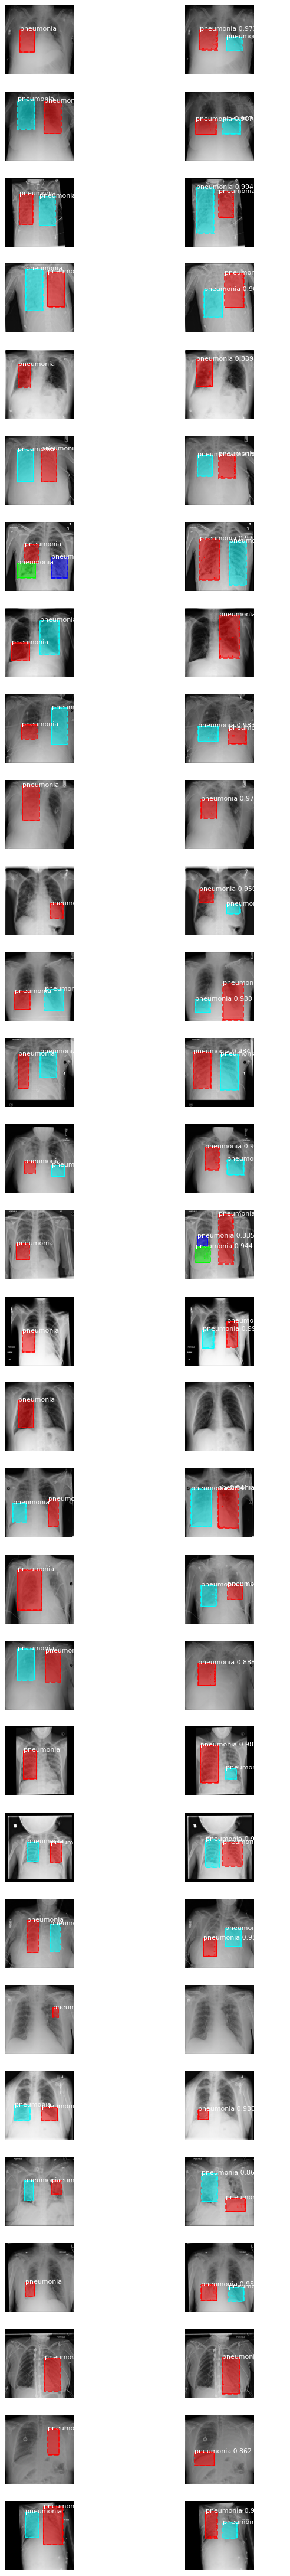

In [ ]:
# Show few example of ground truth vs. predictions on the validation dataset 
dataset = test_set
fig, ax = plt.subplots(30, 2, figsize=(10, 80))

j = 0
while j != 30:
  image_id = np.random.choice(dataset.image_ids)
  # image_id = 100 * i
  image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
  if gt_bbox.shape[0] == 0:
    continue
  display_instances(image, gt_bbox, gt_mask, gt_class_id, dataset.class_names, ax=ax[j][0])
  scaled_image = mold_image(image, cfg)
  results = model.detect([scaled_image]) #, verbose=1)
  r = results[0]
  display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=ax[j][1])
  j += 1

##### Actual (**class-0**) vs Predicted


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to

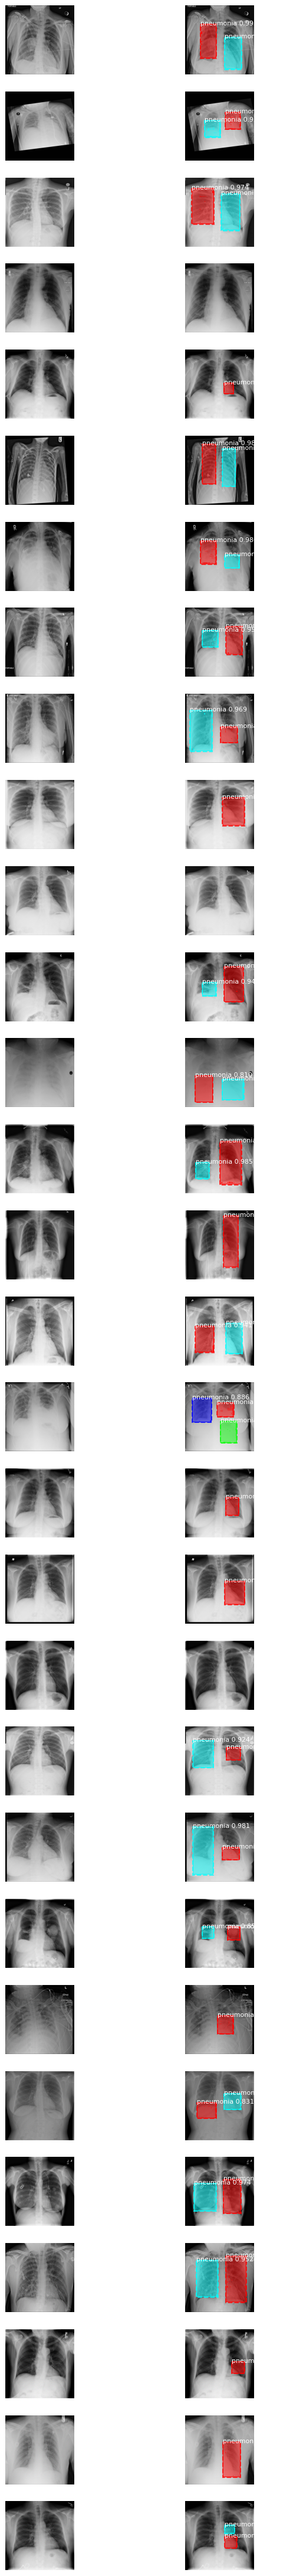

In [ ]:
# Show few example of ground truth vs. predictions on the validation dataset 
dataset = test_set
fig, ax = plt.subplots(30, 2, figsize=(10, 80))

j = 0
while j != 30:
  image_id = np.random.choice(dataset.image_ids)
  # image_id = 100 * i
  image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
  if gt_bbox.shape[0] != 0:
    continue
  display_instances(image, gt_bbox, gt_mask, gt_class_id, dataset.class_names, ax=ax[j][0])
  scaled_image = mold_image(image, cfg)
  results = model.detect([scaled_image]) #, verbose=1)
  r = results[0]
  display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=ax[j][1])
  j += 1

In [ ]:
image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(train_set, cfg, 40, use_mini_mask=False)
scaled_image = mold_image(image, cfg)
sample = np.expand_dims(scaled_image, 0)
yhat = model.detect(sample, verbose=0)
r = yhat[0]
# len(gt_bbox)
# overlap(gt_bbox, r['rois'])
# Ap, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)
# print(Ap)

### The evaluation metric uesd is MAP (Mean Average Precision), maximum can be 1 and minimum be 0 
### We have gotten an MAP of 0.12. To put that into percpective, the best model listed on kaggle has gotten an MAP of 0.25.

## Limitations
#### As can be seen the model performed fairly-well in predicting bbox in case if the patient is infected but performed badly in case of non-infected patients.
#### Putting in other way, there are many of false-positives

### To improve upon this
- one may employ some data augmentation techniques and train  for more epochs.
- another way could be to train a classifier, which is presumably not a very hard problem, to first classify an image into class-1 or class-0 and then predict bounding box only if it belongs to class 1. This way many false positive would be eliminated at the classifier model.